<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-December/blob/main/25-04-21-LeNet/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cifar

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [3]:
class_names = [
               "airplane",	
"automobile",			
"bird",
"cat"	,
"deer",	
"dog"	,
"frog",	
"horse",	
"ship",	
"truck",
]

deer


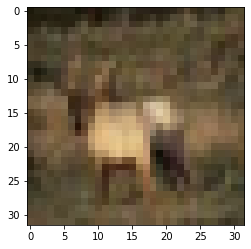

In [4]:
i = 3

print(class_names[y_train[i][0]])
plt.imshow(x_train[i])

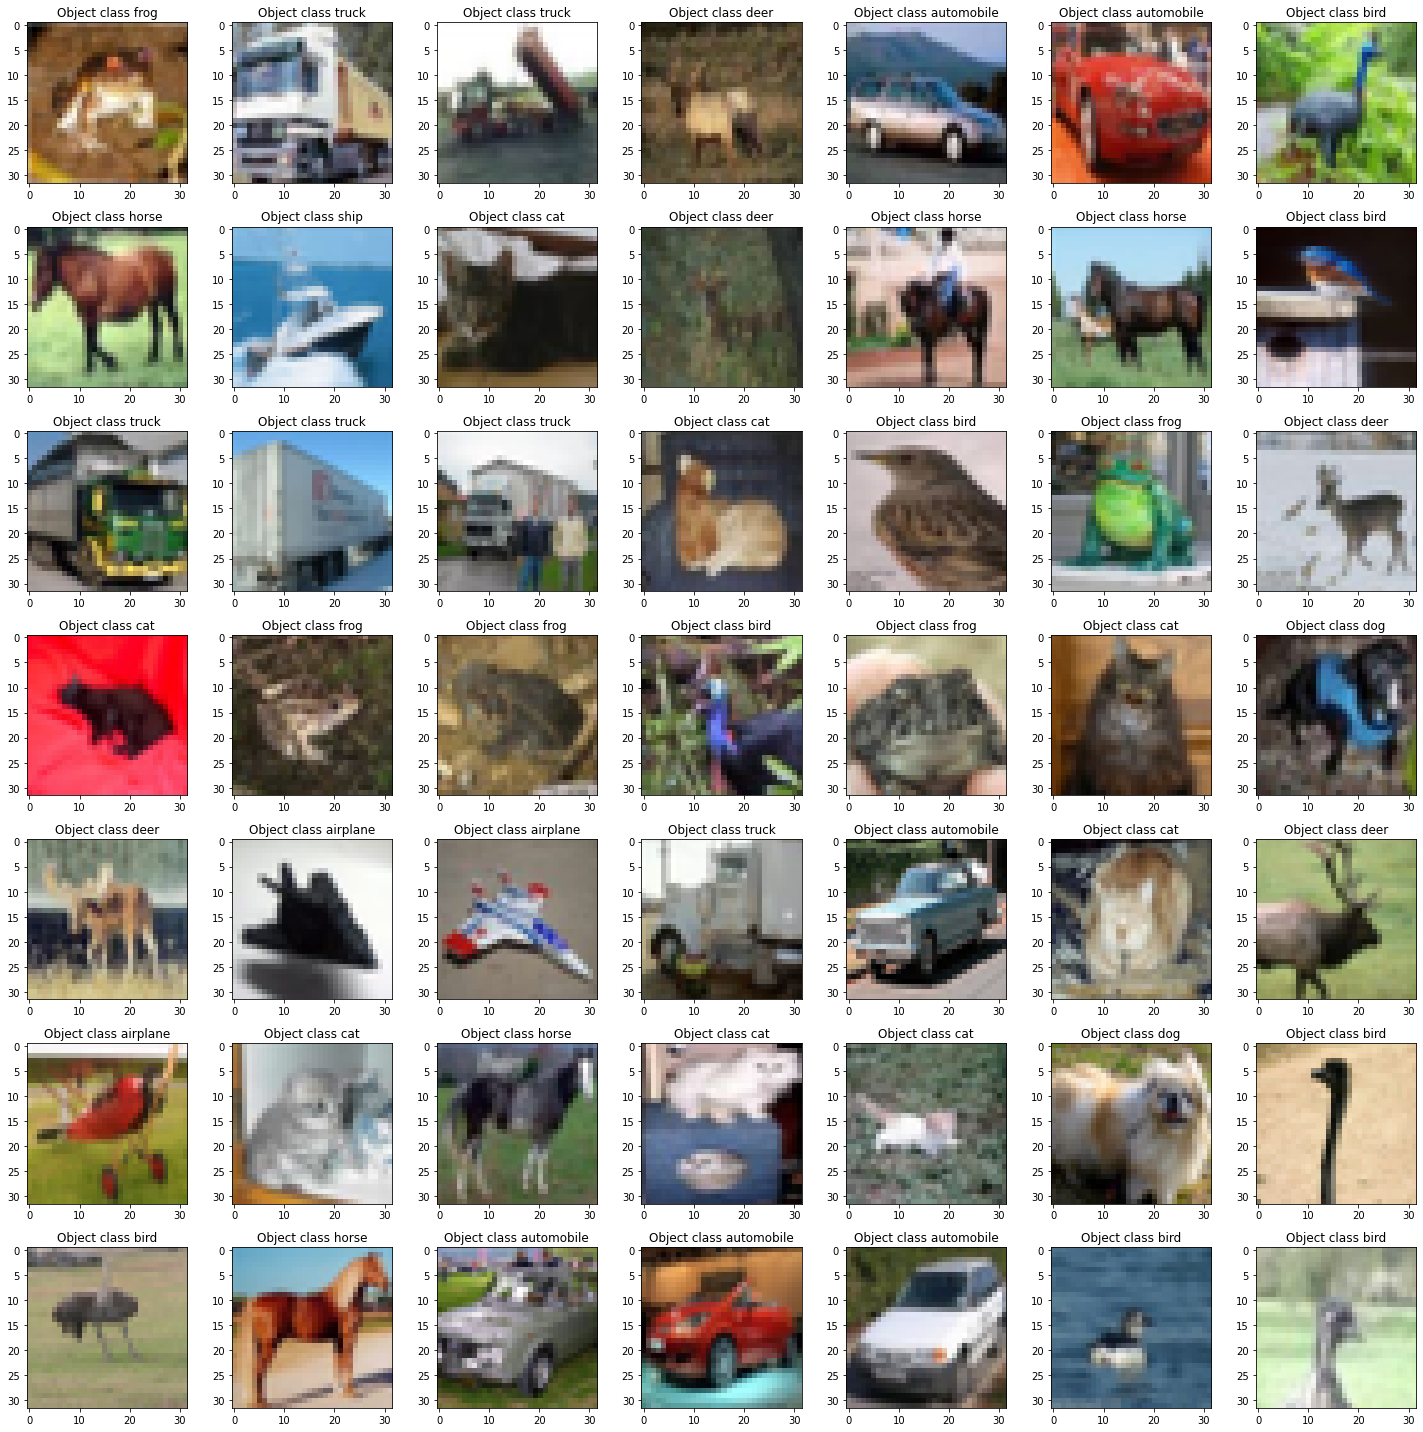

In [5]:
L=7
W=7
fig, axes = plt.subplots(L, W, figsize=(20, 20))
axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(x_train[i])
  axes[i].set_title(f'Object class {class_names[y_train[i][0]]}')

plt.tight_layout()
plt.show()

In [6]:
x_train[0].min(), x_train[0].max()

(0, 255)

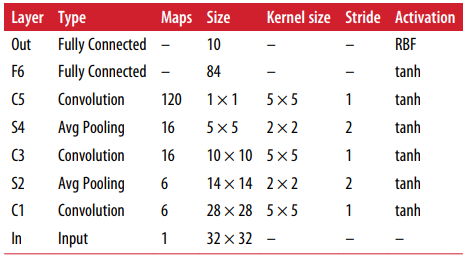

In [7]:
input = tf.keras.Input(shape = (32, 32, 3))

c1 = tf.keras.layers.Conv2D(6, (5,5), activation='tanh')(input)
s2 = tf.keras.layers.AveragePooling2D(pool_size=(2, 2),strides=2,padding='valid')(c1)
a = tf.keras.layers.Activation(tf.keras.activations.tanh)(s2)

c3 = tf.keras.layers.Conv2D(16, (5,5), activation='tanh')(a)
s4 = tf.keras.layers.AveragePooling2D(pool_size=(2, 2),strides=2,padding='valid')(c3)
a = tf.keras.layers.Activation(tf.keras.activations.tanh)(s4)

c5 = tf.keras.layers.Conv2D(120, (5,5), activation='tanh')(a)
f = tf.keras.layers.Flatten()(c5)

d1 = tf.keras.layers.Dense(84, activation='tanh')(f)
output = tf.keras.layers.Dense(10, activation='softmax')(d1)

model = tf.keras.Model(inputs = input, outputs = output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 activation (Activation)     (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                 

In [8]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(x_train, y_train, batch_size=32*4,epochs=50, use_multiprocessing=True, workers=3, validation_data=(x_test, y_test)).history

In [10]:
model.save('model')

INFO:tensorflow:Assets written to: model/assets


In [11]:
! tar -cf ./model.tar ./model

In [15]:
! cp /content/drive/model.tar /content/drive/MyDrive/MODELS/model.tar

cp: cannot stat '/content/drive/model.tar': No such file or directory


In [22]:
pred = model.predict(x_test)

In [23]:
pred = np.argmax(pred, axis = 1)

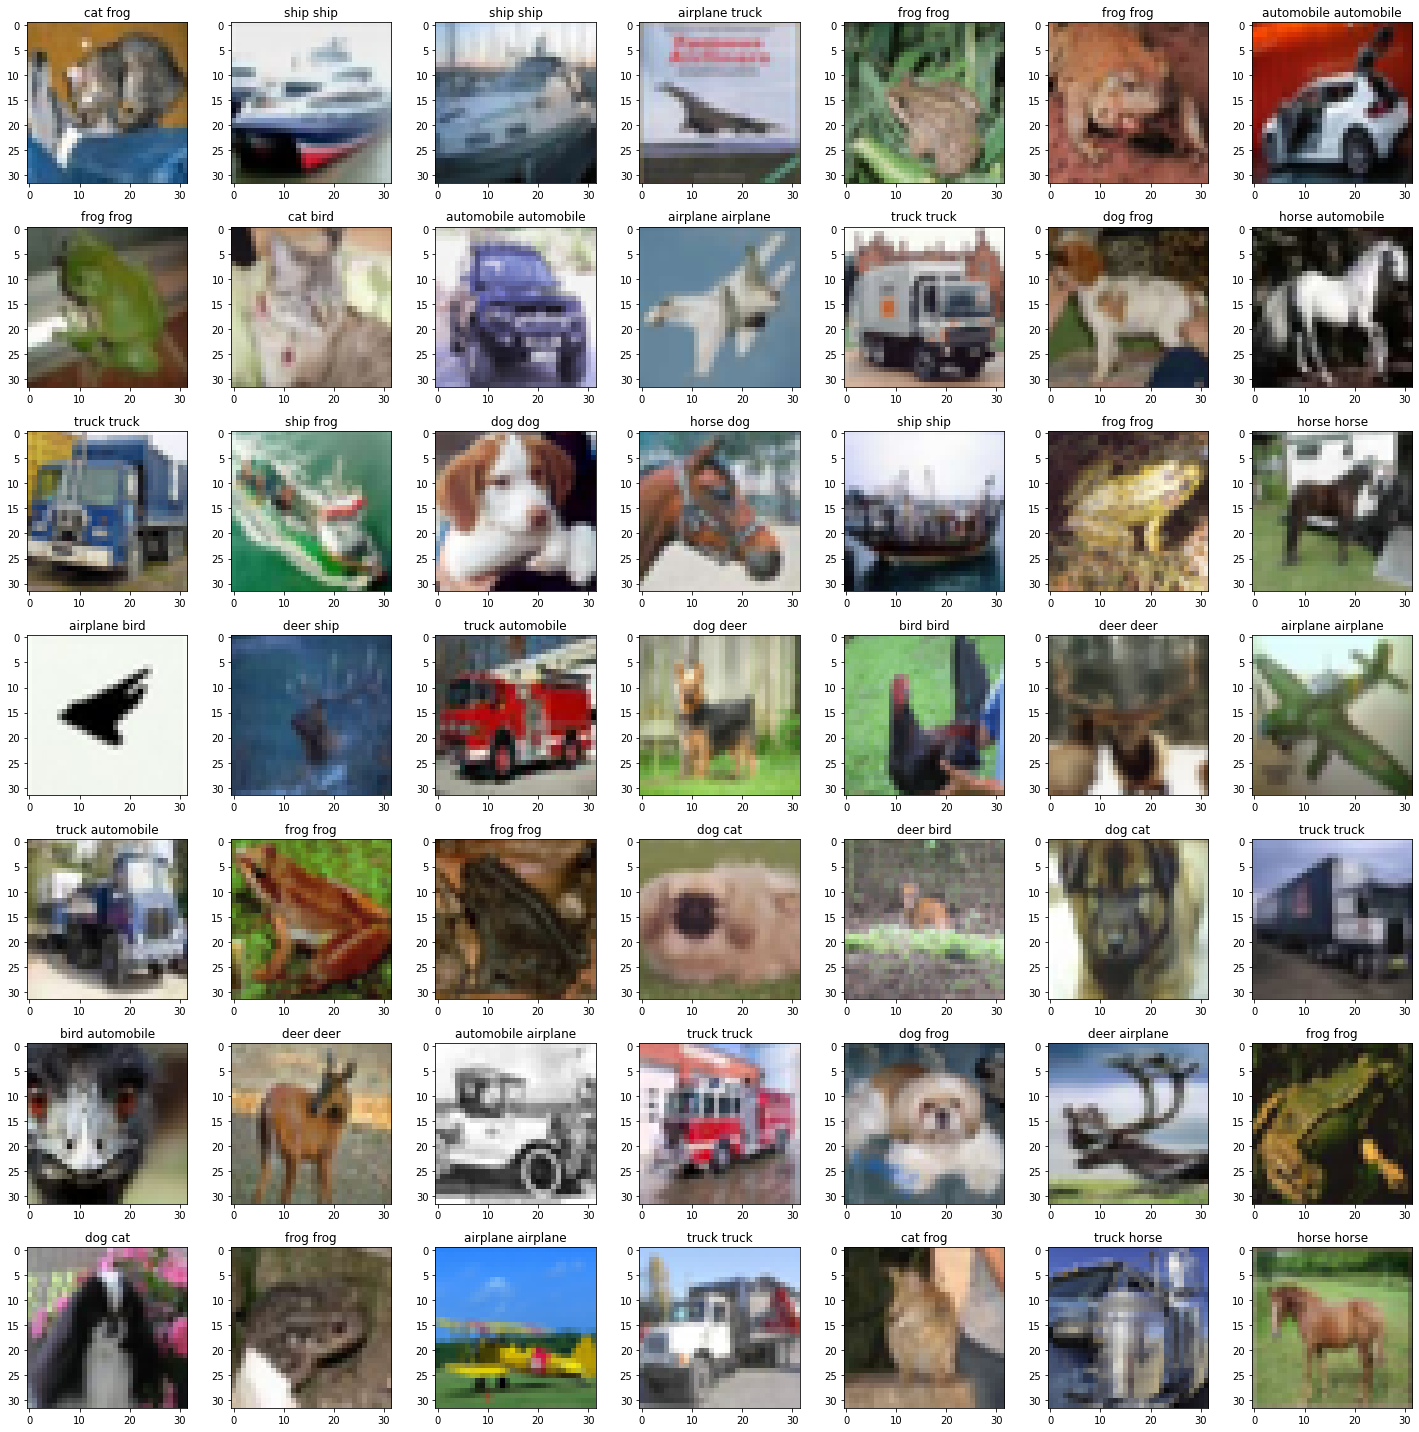

In [24]:
L=7
W=7
fig, axes = plt.subplots(L, W, figsize=(20, 20))
axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(x_test[i])
  axes[i].set_title(f'{class_names[y_test[i][0]]} {class_names[pred[i]]}')

plt.tight_layout()
plt.show()

In [33]:
# input = tf.keras.Input(shape = (32, 32, 3))

# c1 = tf.keras.layers.Conv2D(6, (5,5), activation='tanh')(input)
# s2 = tf.keras.layers.AveragePooling2D(pool_size=(2, 2),strides=2,padding='valid')(c1)
# a = tf.keras.layers.Activation(tf.keras.activations.tanh)(s2)

# c3 = tf.keras.layers.Conv2D(16, (5,5), activation='tanh')(a)
# s4 = tf.keras.layers.AveragePooling2D(pool_size=(2, 2),strides=2,padding='valid')(c3)
# a = tf.keras.layers.Activation(tf.keras.activations.tanh)(s4)

# c5 = tf.keras.layers.Conv2D(120, (5,5), activation='tanh')(a)
# f = tf.keras.layers.Flatten()(c5)

# d1 = tf.keras.layers.Dense(84, activation='tanh')(f)
# output = tf.keras.layers.Dense(10, activation='softmax')(d1)

# model = tf.keras.Model(inputs = input, outputs = output)
# model.summary()

model = tf.keras.Model(inputs = input, outputs = [output, s2, c1])

In [39]:
out_d2, out_s2, out_c1 = model.predict(x_test[[1]])

In [40]:
out_d2.shape, out_s2.shape, out_c1.shape

((1, 10), (1, 14, 14, 6), (1, 28, 28, 6))

In [41]:
out_s2[0, :, :, 0].shape

(14, 14)

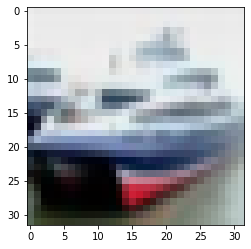

In [38]:
plt.imshow(x_test[1])

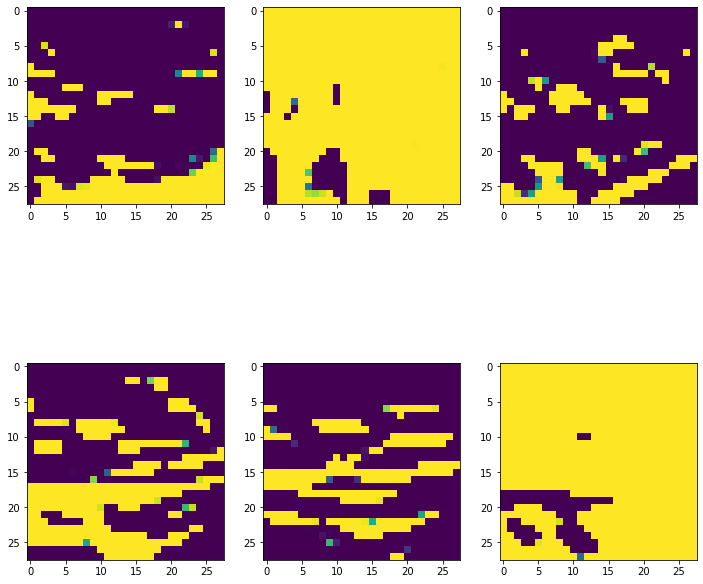

In [42]:
plt.figure(figsize=(12, 12))

for i in range(6):
    plt.subplot(2, 3, i+1)
    img = out_c1[0, :, :, i]
    plt.imshow(img)

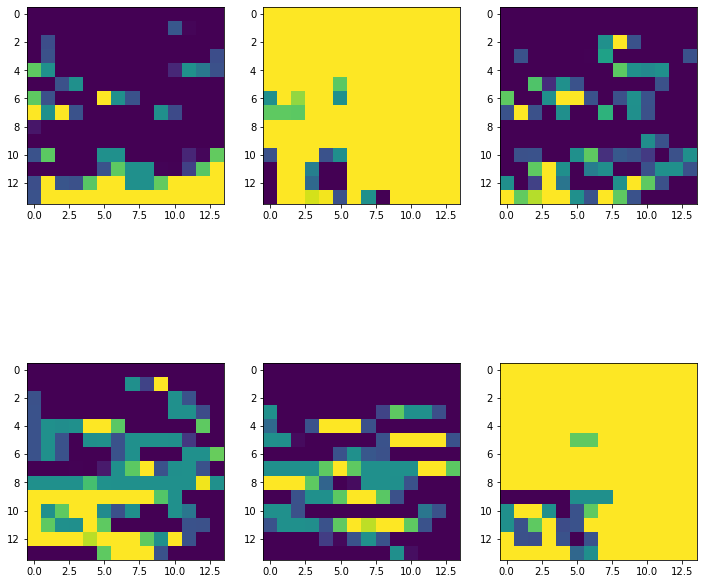

In [43]:
plt.figure(figsize=(12, 12))

for i in range(6):
    plt.subplot(2, 3, i+1)
    img = out_s2[0, :, :, i]
    plt.imshow(img)

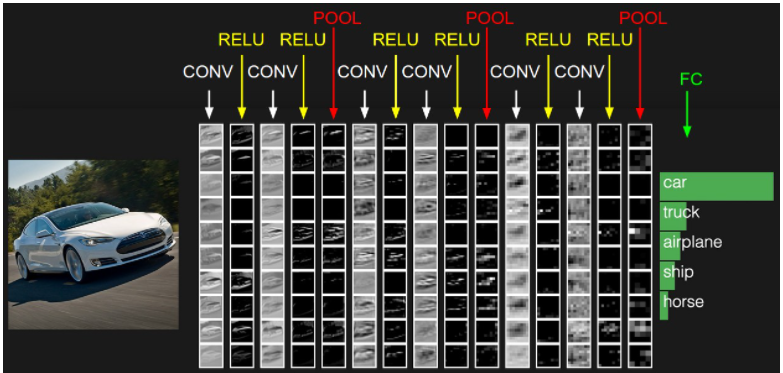